In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("arxiv.csv", parse_dates=True, index_col = "date")

In [15]:
df_list = []

query_list = {
    "knowledge graph",
    "graph database",
    "graph embedding",
    "graph algorithms",
    "graph neural networks",
}

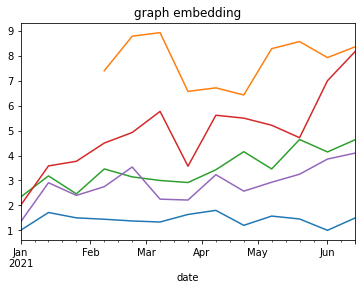

In [16]:
for query in query_list:
    df_sub = df[df["topic"] == query]
    df_samp = df_sub.resample("2W").mean()
    #df_samp = df_samp.iloc[1: , :]

    plot = df_samp["counts"].plot(title=query)    
    df_list.append(df_samp.rename(columns={"counts": query}))

In [17]:
df_list

[            graph database
 date                      
 2021-01-03        1.000000
 2021-01-17        1.714286
 2021-01-31        1.500000
 2021-02-14        1.444444
 2021-02-28        1.375000
 2021-03-14        1.333333
 2021-03-28        1.636364
 2021-04-11        1.800000
 2021-04-25        1.200000
 2021-05-09        1.571429
 2021-05-23        1.454545
 2021-06-06        1.000000
 2021-06-20        1.500000,
             graph algorithms
 date                        
 2021-02-14          7.400000
 2021-02-28          8.785714
 2021-03-14          8.928571
 2021-03-28          6.571429
 2021-04-11          6.714286
 2021-04-25          6.428571
 2021-05-09          8.285714
 2021-05-23          8.571429
 2021-06-06          7.928571
 2021-06-20          8.363636,
             knowledge graph
 date                       
 2021-01-03         2.333333
 2021-01-17         3.181818
 2021-01-31         2.461538
 2021-02-14         3.461538
 2021-02-28         3.142857
 2021-03-14    

In [18]:
df_full = pd.concat(df_list, axis=1, join="inner").reindex(df_samp.index).fillna(0)
df_full

,graph database,graph algorithms,knowledge graph,graph neural networks,graph embedding
date,,,,,
2021-01-03,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-17,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-31,0.000000,0.000000,0.000000,0.000000,0.000000
2021-02-14,1.444444,7.400000,3.461538,4.500000,2.750000
2021-02-28,1.375000,8.785714,3.142857,4.923077,3.538462
2021-03-14,1.333333,8.928571,3.000000,5.769231,2.250000
2021-03-28,1.636364,6.571429,2.916667,3.571429,2.214286
2021-04-11,1.800000,6.714286,3.428571,5.615385,3.230769
2021-04-25,1.200000,6.428571,4.153846,5.500000,2.571429


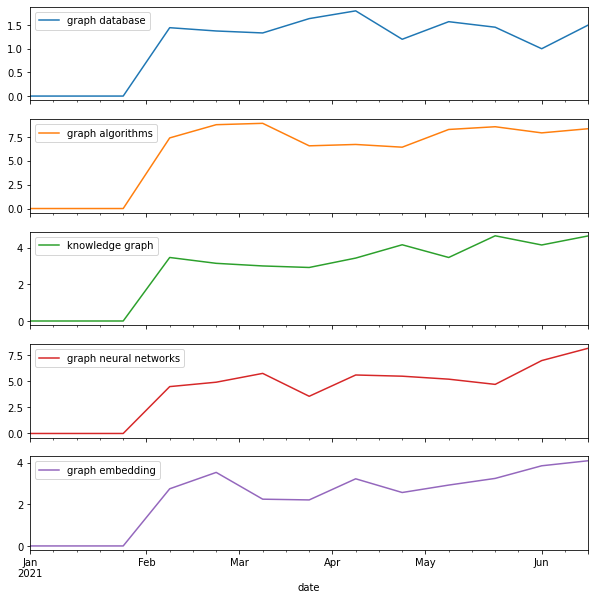

In [19]:
plot = df_full.plot(subplots=True, figsize=(10, 10))
fig = plot[0].get_figure()
fig.savefig("arxiv.png")